# Keras project

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme()

## Description of the data columns

*loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


*term: The number of payments on the loan. Values are in months and can be either 36 or 60.


*int_rate: Interest Rate on the loan


*installment: The monthly payment owed by the borrower if the loan originates.


*grade: LC assigned loan grade


*sub_grade: LC assigned loan subgrade


*emp_title: The job title supplied by the Borrower when applying for the loan.*


*emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


*home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


*annual_inc: The self-reported annual income provided by the borrower during registration.


*verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified


*issue_d: The month which the loan was funded


*loan_status: Current status of the loan


*purpose: A category provided by the borrower for the loan request. 


*title: The loan title provided by the borrower


*zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application.


*addr_state: The state provided by the borrower in the loan application


*dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


*earliest_cr_line: The month the borrower's earliest reported credit line was opened


*open_acc: The number of open credit lines in the borrower's credit file.


*pub_rec: Number of derogatory public records


*revol_bal: Total credit revolving balance


*revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


*total_acc: The total number of credit lines currently in the borrower's credit file


*initial_list_status: The initial listing status of the loan. Possible values are – W, F


*application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers


*mort_acc: Number of mortgage accounts.


*pub_rec_bankruptcies: Number of public record bankruptcies

In [4]:
df = pd.read_csv('lending_club_loan_two.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


## Feature extraction

We drop the features where we can't extract usefull information or at least it'd be extreamly hard to. This are the easy ones to spot

In [8]:
df['title'].nunique()

48817

In [9]:
df['emp_title'].nunique() 

173105

There are too many kind of elemnts in this columns to make something out of it (turn them into dummy variables)

In [10]:
df = df.drop(['emp_title','title'], axis=1)

### We'll check every column to take care of cathegorical data and null values and also, by way of visualization, cheching if the info is even usefull

####  loan_status

In [11]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

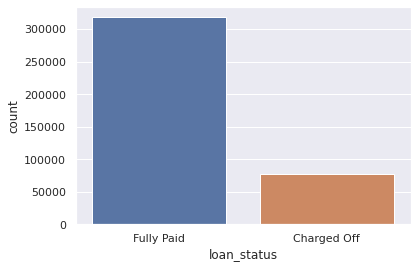

In [12]:
sns.countplot(x=df['loan_status'])

For the loan_status we set 1  as fully paid and 0 for charged off.

In [13]:
df['loan_status'] = df['loan_status'].apply(lambda status: int(status == 'Fully Paid'))

#### address

Making use of the adress by extracting the zip code

In [14]:
df['zip_code'] = df['address'].apply(lambda x: int(x.split()[-1]))

In [15]:
df = df.drop('address',axis=1)

#### term

We turn the term column elements into a 0 if the ter is 36 months long or 1 if its 60 months long

In [16]:
df['term'] = df['term'].apply(lambda x: (int(x.split()[0])-36)/24)

<AxesSubplot:xlabel='term', ylabel='count'>

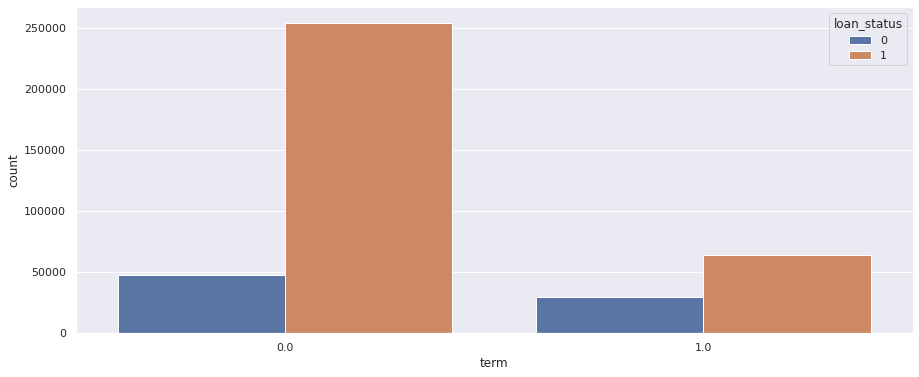

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='term', hue='loan_status')

Way more probable for the loan to be fully payed when the term is 36 months long

#### grade
We'll turn this cathegorical data into dummies 

In [18]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [19]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [20]:
grade_order = ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5']

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

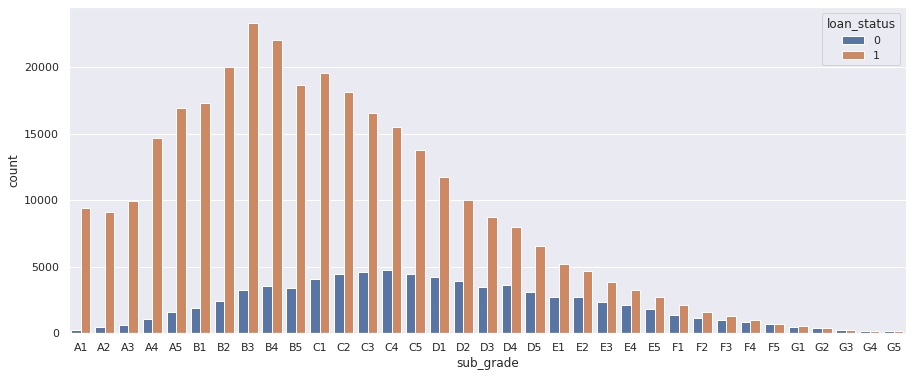

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='sub_grade', hue='loan_status', order=grade_order)

In [22]:
df = pd.concat([df,pd.get_dummies(df['sub_grade'], drop_first=True)],axis=1)

In [23]:
df=df.drop(['sub_grade','grade'], axis=1)

#### emp_length

We map the employment lengt as the description mentions it, but first we take care of the nan values.

In [24]:
df['emp_length']=df['emp_length'].fillna(0)

In [25]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year', 0],
      dtype=object)

In [26]:
def emp_time(years):
    if years == 0:
        return 0
    else:
        x = years.split()[0]
        if x == '<':
            return 0
        elif x.split('+')[0] == '10':
            return 10
        else:
            return int(x)

In [27]:
df['emp_length'] = df['emp_length'].apply(emp_time)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

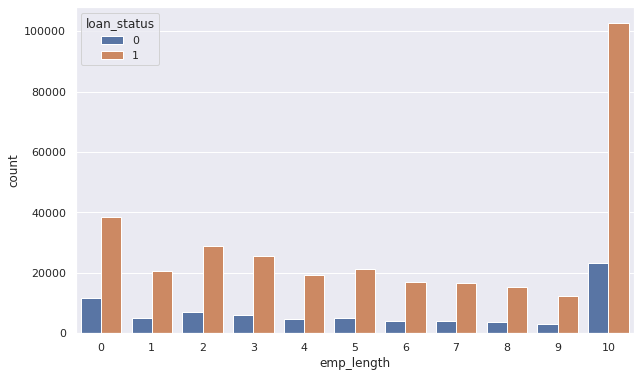

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='emp_length', hue='loan_status')

If we take the rate of number of loans with status 0 with the total number of loans per employment length we can see if this piece of information is usefull or not

In [29]:
gb = df.groupby(['emp_length','loan_status']).count()

In [30]:
rates = np.zeros(11)
for i in range(11):
    rates[i] = gb['loan_amnt'][i][0]/ (gb['loan_amnt'][i][1]+gb['loan_amnt'][i][0])

In [31]:
(rates.max() - rates.min())*100

4.7713314131197535

There is at most a $4\%$ variation in the rates so maybe this column won't be of much use in the model

In [32]:
df= df.drop('emp_length', axis=1)

#### issue_d

In general, we dont know when will this happen, so we drop the feature

In [33]:
df = df.drop('issue_d', axis=1)

#### application_type (cathegorical data)

In [34]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [35]:
df['application_type'][0]

'INDIVIDUAL'

In [36]:
df.groupby(['application_type','loan_status']).count()['loan_amnt']

application_type  loan_status
DIRECT_PAY        0                 102
                  1                 184
INDIVIDUAL        0               77517
                  1              317802
JOINT             0                  54
                  1                 371
Name: loan_amnt, dtype: int64

<AxesSubplot:xlabel='application_type', ylabel='count'>

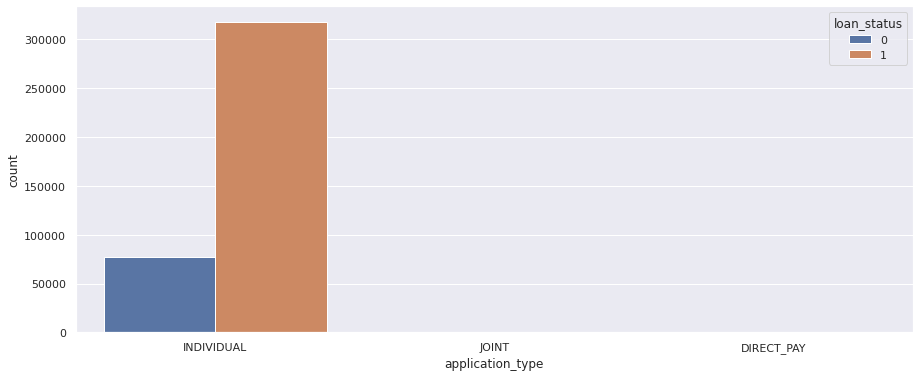

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='application_type', hue='loan_status')

Although there are distiguishable trends in all the cases, the joint and direct_pay make up for $\sim 0.18\%$ of all the data, so we'll discard this feature.

In [38]:
df = df.drop('application_type', axis=1)

#### purpose

In [39]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

<AxesSubplot:xlabel='purpose', ylabel='count'>

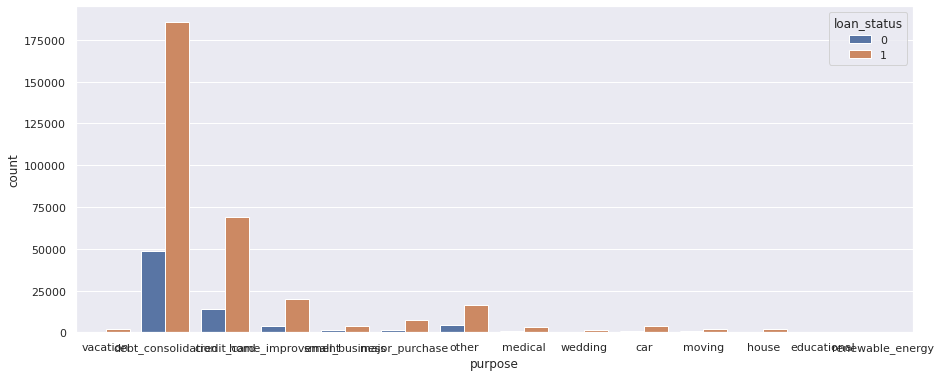

In [40]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='purpose', hue='loan_status')

Kinda worth making the purpose data usable. It's dificult to see if there is any trend for any of the purpose kinds to fully pay o not the loan, more than that there are more fully paid than not.

In [41]:
df = pd.concat([pd.get_dummies(df['purpose'],drop_first=True),df],axis=1)

In [42]:
df = df.drop('purpose',axis=1)

#### home_ownership

In [43]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

It seems a person that pays rent is less probable to fully pay the loan. As for the NONE and ANY cathegories, well group them into the OTHER cathegory as they are not really an important part of the dataset

In [44]:
def home(x):
    if x == 'NONE' or x == 'ANY':
        return 'OTHER'
    else:
        return x

In [45]:
df['home_ownership'] = df['home_ownership'].apply(home)

In [46]:
df = pd.concat([pd.get_dummies(df['home_ownership'],drop_first=True),df],axis=1)

In [47]:
df = df.drop('home_ownership',axis=1)

#### earliest_cr_line

In [48]:
df['earliest_cr_line_year'] = pd.to_datetime(df['earliest_cr_line']).apply(lambda x:x.year)

In [49]:
df = df.drop('earliest_cr_line',axis=1)

<AxesSubplot:xlabel='earliest_cr_line_year', ylabel='Count'>

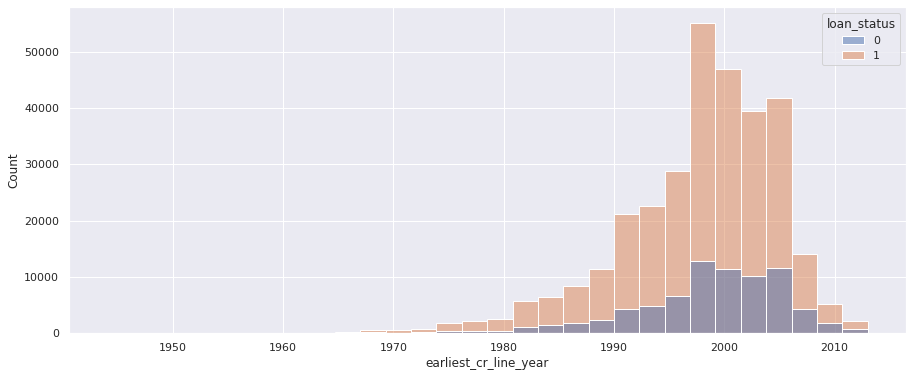

In [50]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='earliest_cr_line_year', hue='loan_status', bins=30)

#### initial_list_status

We set $w\rightarrow 1$ and $f\rightarrow 0$

In [51]:
df['initial_list_status_w'] =  df['initial_list_status'].apply(lambda x: int(x=='w'))

In [52]:
df = df.drop('initial_list_status',axis=1)

#### verification_status

In [53]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

<AxesSubplot:xlabel='verification_status', ylabel='count'>

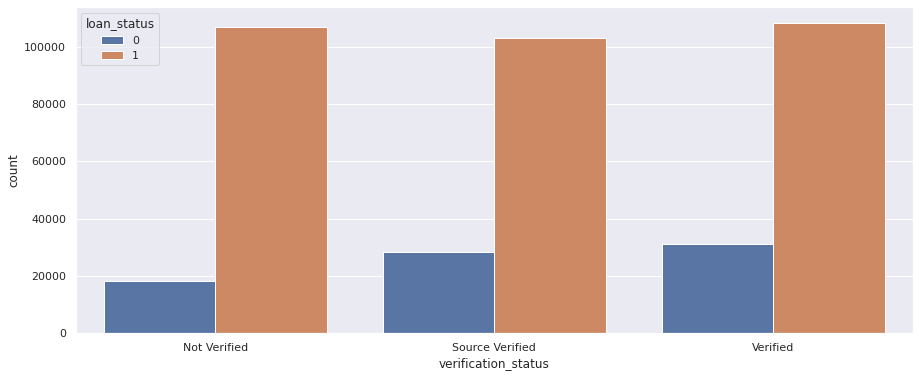

In [54]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='verification_status', hue='loan_status')

As expected, the Not verified status does impact a little bit the loan status.

In [55]:
df = pd.concat([df,pd.get_dummies(df['verification_status'],drop_first=True)],axis=1)

In [56]:
df = df.drop('verification_status',axis=1)

#### revol_util
There are some nan values here and in the next columns. In this case we'll set them to the mean value of the column

In [57]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

In [58]:
df['revol_util']

0         41.8
1         53.3
2         92.2
3         21.5
4         69.8
          ... 
396025    34.3
396026    95.7
396027    66.9
396028    53.8
396029    91.3
Name: revol_util, Length: 396030, dtype: float64

#### mort_acc

<AxesSubplot:xlabel='mort_acc', ylabel='count'>

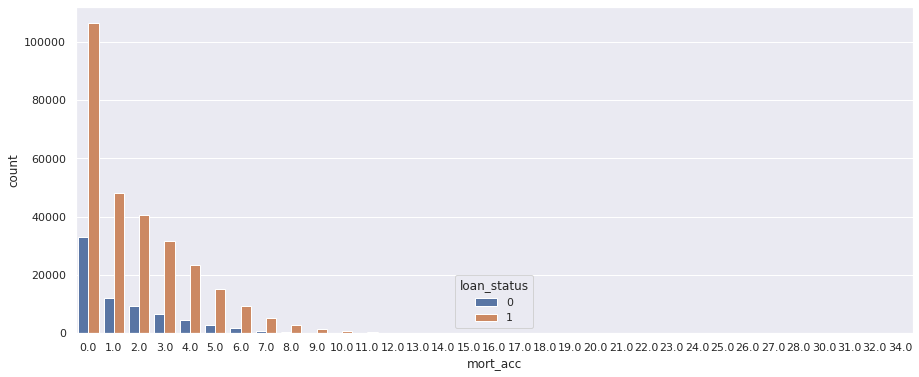

In [59]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='mort_acc', hue='loan_status')

In [60]:
df['mort_acc'] = df['mort_acc'].fillna(0)

#### pub_rec_bankruptcies

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

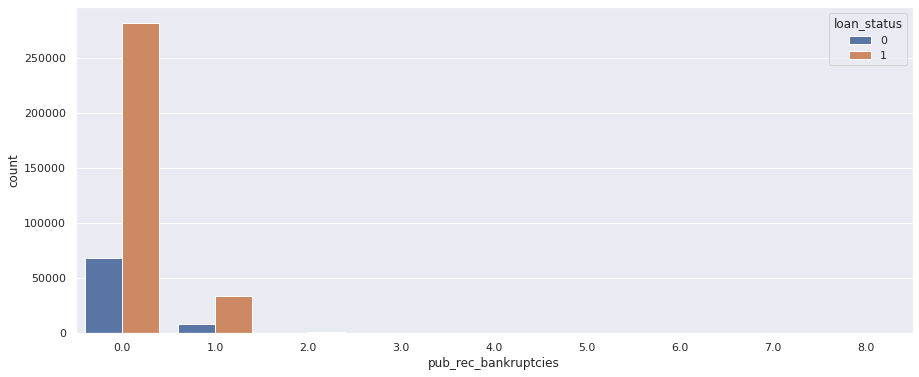

In [61]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='pub_rec_bankruptcies', hue='loan_status')

In [62]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

#### loan_amnt

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

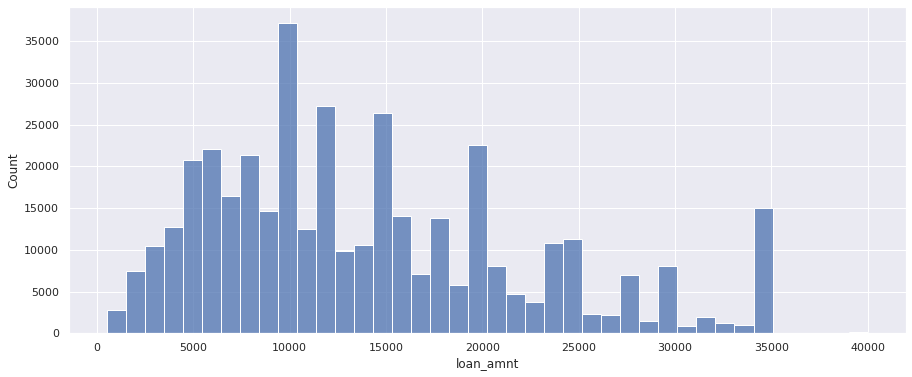

In [63]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='loan_amnt', bins=40)

#### After we extracted the most out of our info, we can try to vizualice some of the variables and dow do they correlate

<AxesSubplot:>

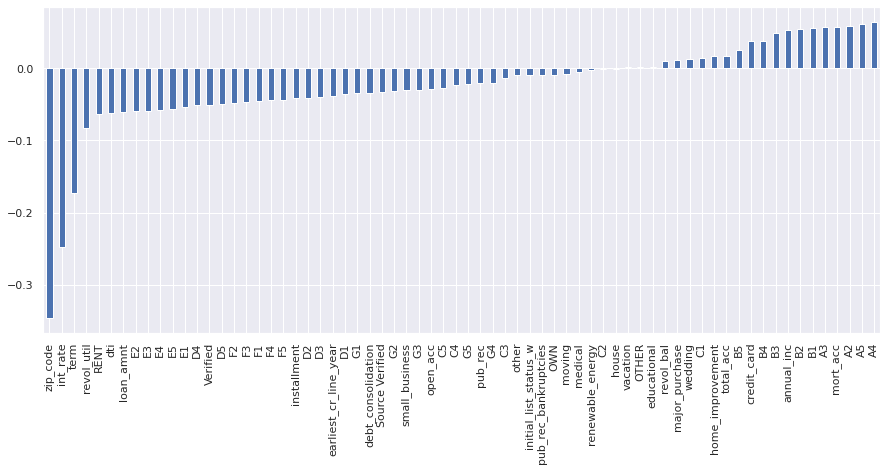

In [64]:
plt.figure(figsize=(15,6))
df.corr()['loan_status'].sort_values()[:-1].plot(kind='bar')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   OTHER                  396030 non-null  uint8  
 1   OWN                    396030 non-null  uint8  
 2   RENT                   396030 non-null  uint8  
 3   credit_card            396030 non-null  uint8  
 4   debt_consolidation     396030 non-null  uint8  
 5   educational            396030 non-null  uint8  
 6   home_improvement       396030 non-null  uint8  
 7   house                  396030 non-null  uint8  
 8   major_purchase         396030 non-null  uint8  
 9   medical                396030 non-null  uint8  
 10  moving                 396030 non-null  uint8  
 11  other                  396030 non-null  uint8  
 12  renewable_energy       396030 non-null  uint8  
 13  small_business         396030 non-null  uint8  
 14  vacation               396030 non-nu

##  Model creation

In [66]:
X = df.drop('loan_status',axis=1).values
y = df['loan_status'].values

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler()

In [71]:
X_train = scaler.fit_transform(X_train)

In [72]:
X_test = scaler.transform(X_test)

In [73]:
X_train.shape

(277221, 68)

In [74]:
from tensorflow.keras.models import Sequential

In [75]:
from tensorflow.keras.layers import Dense,Dropout

In [76]:
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
from tensorflow.keras.initializers import Constant

In [78]:
cero, one = np.bincount(y)
initial_bias = np.log(one/cero)

Actual definition of the nn sequential model with sigmoid output for binary classification

In [ ]:
nn = Sequential()

nn.add(Dense(68, activation='relu',bias_initializer=Constant(initial_bias))) #input
nn.add(Dropout(0.1))

nn.add(Dense(51, activation='relu'))
nn.add(Dropout(0.1))

nn.add(Dense(34, activation='relu')) 
nn.add(Dropout(0.1))

nn.add(Dense(17, activation='relu')) 
nn.add(Dropout(0.1))

nn.add(Dense(1, activation='sigmoid')) #output

nn.compile(loss='binary_crossentropy', optimizer='adam')

We add a callback to avoid overfittig the model

In [80]:
callback = EarlyStopping(monitor='val_loss', mode='auto', patience=20, verbose=1,restore_best_weights=True)

In [81]:
nn.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test,y_test),callbacks=[callback])

Epoch 1/500
8664/8664 [==============================] - 41s 5ms/step - loss: 0.3929 - val_loss: 0.3503
Epoch 2/500
8664/8664 [==============================] - 36s 4ms/step - loss: 0.3179 - val_loss: 0.2804
Epoch 3/500
8664/8664 [==============================] - 36s 4ms/step - loss: 0.2881 - val_loss: 0.2789
Epoch 4/500
8664/8664 [==============================] - 37s 4ms/step - loss: 0.2846 - val_loss: 0.2790
Epoch 5/500
8664/8664 [==============================] - 36s 4ms/step - loss: 0.2834 - val_loss: 0.2775
Epoch 6/500
8664/8664 [==============================] - 36s 4ms/step - loss: 0.2822 - val_loss: 0.2772
Epoch 7/500
8664/8664 [==============================] - 40s 5ms/step - loss: 0.2815 - val_loss: 0.2775
Epoch 8/500
8664/8664 [==============================] - 40s 5ms/step - loss: 0.2807 - val_loss: 0.2771
Epoch 9/500
8664/8664 [==============================] - 39s 5ms/step - loss: 0.2806 - val_loss: 0.2768
Epoch 10/500
8664/8664 [==============================] - 35s 4m

8664/8664 [==============================] - 39s 4ms/step - loss: 0.2645 - val_loss: 0.2657
Restoring model weights from the end of the best epoch.
Epoch 00079: early stopping


In [82]:
losses = pd.DataFrame(nn.history.history)

<AxesSubplot:>

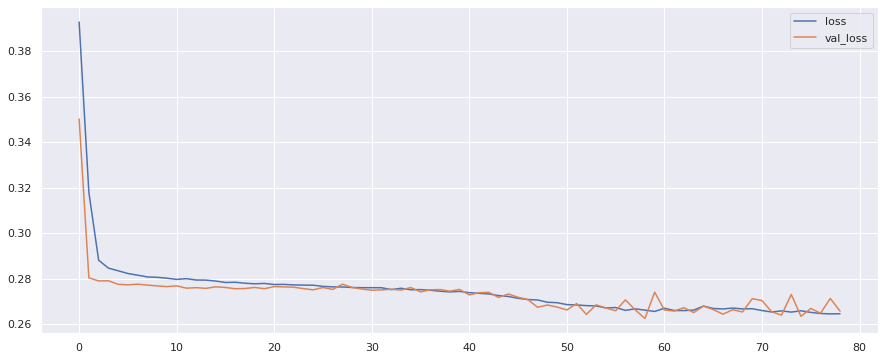

In [83]:
losses.plot(figsize=(15,6))

In [84]:
y_pred = np.round(nn.predict(X_test))

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     23260
           1       0.88      1.00      0.93     95549

    accuracy                           0.89    118809
   macro avg       0.92      0.72      0.77    118809
weighted avg       0.90      0.89      0.87    118809



[[10422 12838]
 [  404 95145]]


In [15]:
((df['loan_status'] ==1).sum()/396030)*100

80.38709188697825

0.89% of accuracy is pretty good, even when taking in count that by just choosing one option (fully paid) you would get 80% accuracy.